<a href="https://colab.research.google.com/github/Dh0t/Tugas/blob/main/NLP_PTM10_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Persiapan Data Deret Waktu Dummy
# Kita akan membuat deret waktu sinusoidal sederhana
timesteps = 1000
data = np.sin(np.linspace(0, 20 * np.pi, timesteps))

# Normalisasi data (penting untuk RNN/LSTM)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

# Fungsi untuk membuat dataset deret waktu (sequence data)
# Input: data_scaled (array 2D), n_timesteps (jumlah timestep untuk setiap sampel)
# Output: X (fitur), y (target)
def create_sequences(data, n_timesteps):
    X, y = [], []
    for i in range(len(data) - n_timesteps):
        X.append(data[i:(i + n_timesteps), 0])
        y.append(data[i + n_timesteps, 0])
    return np.array(X), np.array(y)

n_timesteps = 10 # Kita akan menggunakan 10 timestep sebelumnya untuk memprediksi nilai berikutnya
X, y = create_sequences(data_scaled, n_timesteps)

# Reshape X untuk input LSTM: (jumlah_sampel, jumlah_timestep, jumlah_fitur)
# Kita hanya punya 1 fitur (nilai sin)
X = X.reshape(X.shape[0], X.shape[1], 1)

print(f"Bentuk X setelah reshape: {X.shape}") # (jumlah_sampel, 10, 1)
print(f"Bentuk y: {y.shape}") # (jumlah_sampel,)


Bentuk X setelah reshape: (990, 10, 1)
Bentuk y: (990,)


In [40]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nBentuk X_train: {X_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")
print(f"Bentuk y_train: {y_train.shape}")
print(f"Bentuk y_test: {y_test.shape}")


Bentuk X_train: (792, 10, 1)
Bentuk X_test: (198, 10, 1)
Bentuk y_train: (792,)
Bentuk y_test: (198,)


In [42]:
# 2. Membangun Model LSTM
model = Sequential()
# Input shape: (jumlah_timestep, jumlah_fitur)
# return_sequences=True jika Anda ingin menumpuk lapisan LSTM lain di atasnya
model.add(LSTM(units=50, activation='relu', input_shape=(n_timesteps, 1)))
# Output layer untuk regresi (prediksi nilai)
model.add(Dense(units=1))

# Kompilasi Model
model.compile(optimizer='adam', loss='mse') # Mean Squared Error untuk masalah regresi

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# 3. Melatih Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2075e-05 - val_loss: 8.0680e-06
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0334e-05 - val_loss: 8.5910e-06
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.0958e-06 - val_loss: 8.2170e-06
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.1702e-06 - val_loss: 8.5011e-06
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0030e-05 - val_loss: 1.1964e-05
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1277e-05 - val_loss: 1.9317e-05
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5210e-05 - val_loss: 8.4330e-06
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0691e-05 - val_loss: 7.5361e-06
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.1735e-06 - val_loss: 1.5685e-05
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3443e-05 - val_loss: 8.2092e-06
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.0629e-06 - val_lo

In [45]:
# 4. Evaluasi Model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"\nLoss (Mean Squared Error) pada data uji: {loss:.4f}")


Loss (Mean Squared Error) pada data uji: 0.0000


In [48]:
# 5. Membuat Prediksi
y_pred_scaled = model.predict(X_test)

# Mengembalikan skala prediksi ke skala asli
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


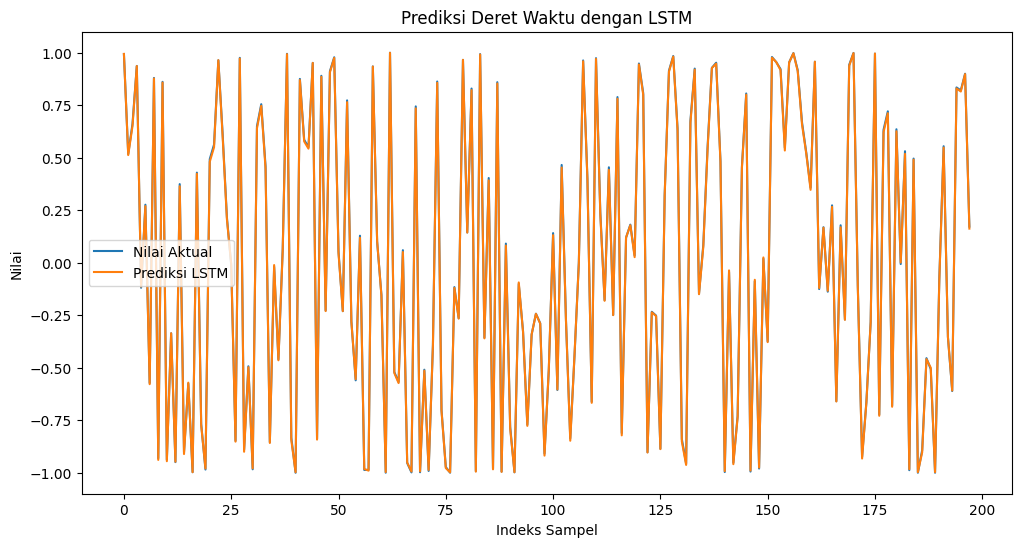

In [49]:
# 6. Visualisasi Hasil
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Nilai Aktual')
plt.plot(y_pred, label='Prediksi LSTM')
plt.title('Prediksi Deret Waktu dengan LSTM')
plt.xlabel('Indeks Sampel')
plt.ylabel('Nilai')
plt.legend()
plt.show()

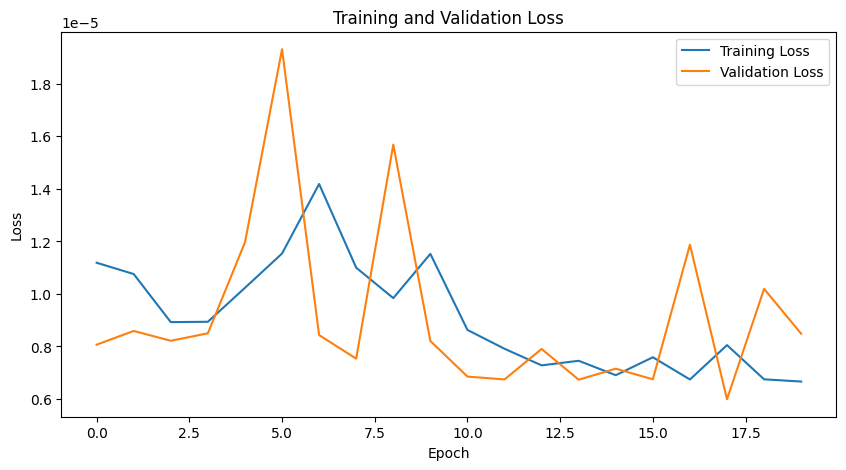

In [50]:
# Visualisasi Loss selama pelatihan
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()